<a href="https://colab.research.google.com/github/evisChan/assigment3/blob/main/Assigment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Library, Data Preprocessing, EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#import category_encoders as ce

plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

<ipython-input-116-90f895bd5de3>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stupend-sc/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Cek missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data tidak ada yang missing value

## Duplicates Values

In [ ]:
duplicated_values = df.duplicated().sum()

# Jumlah nilai yang duplikat
print("Duplicated Values: ", duplicated_values)

# Menampilkan baris-baris yang duplikat
duplicate_rows = df[df.duplicated()]
duplicate_rows

Duplicated Values:  723


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## Imbalance Data

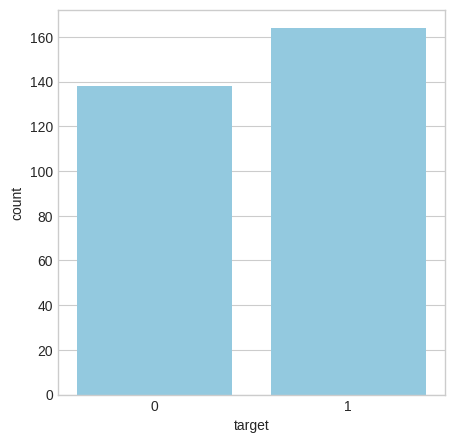

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
# visualisasi ketidakseimbangan data pada kolom 'target'
fig = plt.figure(figsize=(5,5))
sns.countplot(x=df['target'], color='skyblue')
fig.show()

In [ ]:
class_counts = df['target'].value_counts()
print(class_counts)

1    164
0    138
Name: target, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy={0: 164, 1: 164})

# Melakukan oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)


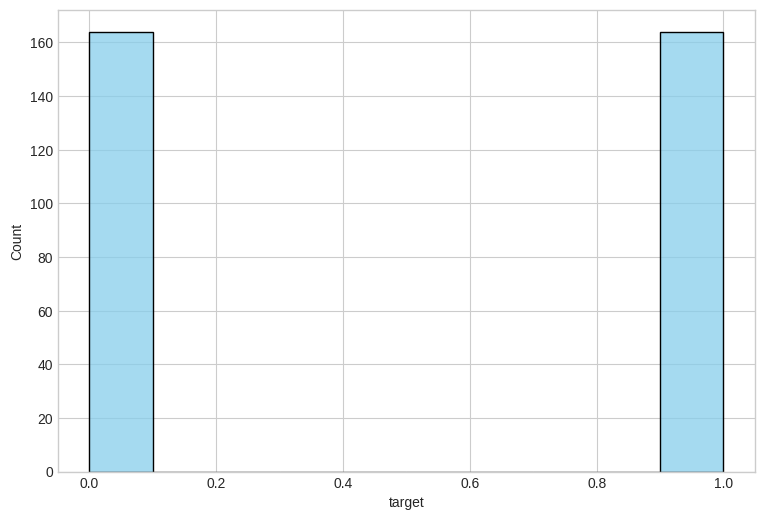

In [ ]:
# Membuat histogram untuk variabel target yang telah diresampling
plt.figure(figsize=(9, 6))
sns.histplot(data=y_resampled, color='skyblue')
plt.show()

## Outlier

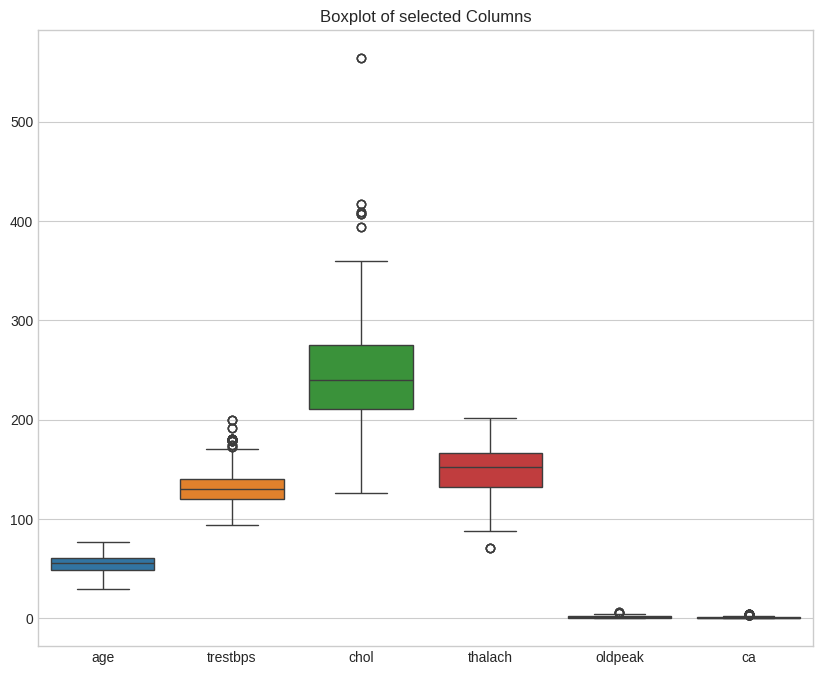

In [ ]:
# Menampilkan Outlier menggunakan Boxplot
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']])
plt.title('Boxplot of selected Columns')
plt.show()

In [ ]:
def outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  new_data = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return new_data

column_outliers = []
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
    column_outliers.extend(outliers(df, col))

df.drop(column_outliers, axis=0, inplace=True)

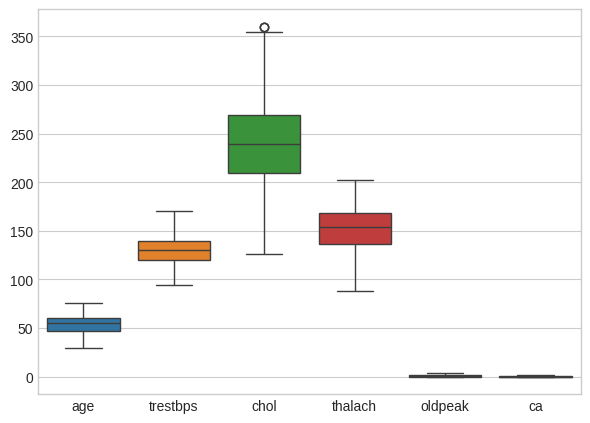

In [ ]:
plt.rcParams['figure.figsize'] = [7,5]
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']])
plt.show()

saya tidak membuat future encoding karena semua data sudah numeric

# EDA

## Kolaborasi features & tipe data (nominal, ordinal, numerical)

In [ ]:
df_info = pd.DataFrame(df.dtypes, columns=['Data Type'])

# tipe data numerik dan kategori
df_info['Feature Type']=''
df_info.loc[df_info['Data Type'] == 'object', 'Feature Type'] = 'Categorical'
df_info.loc[df_info['Data Type'] == 'object', 'Feature Type'] = 'Numerical'
# menampilkan fitur
print("Informasi Features dan Type Data: ")
print(df_info)


Informasi Features dan Type Data: 
         Data Type Feature Type
age          int64             
sex          int64             
cp           int64             
trestbps     int64             
chol         int64             
fbs          int64             
restecg      int64             
thalach      int64             
exang        int64             
oldpeak    float64             
slope        int64             
ca           int64             
thal         int64             
target       int64             


## Perbedaan Mean, Median, Modus

*  Mean, adalah nilai rata-rata dari semua data dalam suatu sampel atau populasi. mean sering digunakan untuk mengisi missing values dalam sebuah dataset dengan variabel numerical

*  Median, adalah nilai tengah dari dataset yang telah diurutkan. Median sering digunakan untuk mengisi missing values jika distribusi data memiliki skewness atau terdapat outliers yang signifikan.

*  Modus, adalah nilai yang paling sering muncul dalam dataset. Modus digunakan untuk mengisi missing values dalam variabel kategorikal.

Perbedaannya Mean mengisi missing values dengan membagi dengan jumlah total nilai, median dengan mengambil nilai tengah dan berlaku untuk varibael numerical sedangkan Modus dengan nilai yang sering muncul dan hanya untuk variabel kategorikal dan tidak optimal untuk data Numeric


In [ ]:
age_mean = df['age'].mean()
age_modus = df['age'].mode().values[0]
age_median = df['age'].median()

print("Mean Usia", age_mean)
print("Modus Usia", age_modus)
print("Median Usia", age_median)


Mean Usia 54.43414634146342
Modus Usia 58
Median Usia 56.0


## Statistical five summary

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
min_value = df.min()
min_value

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

In [ ]:
max_value = df.max()
max_value

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

In [ ]:
quarts = np.percentile(df, [25,50,75])
q1 = quarts[0]
q1

q2 = quarts[1]
q2

q3 = quarts[2]
q3

print("q1 : ", q1)
print("q2 : ", q2)
print("q3: ", q3)


q1 :  0.0
q2 :  1.0
q3:  56.0


## Deskripsi Distribusi Data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

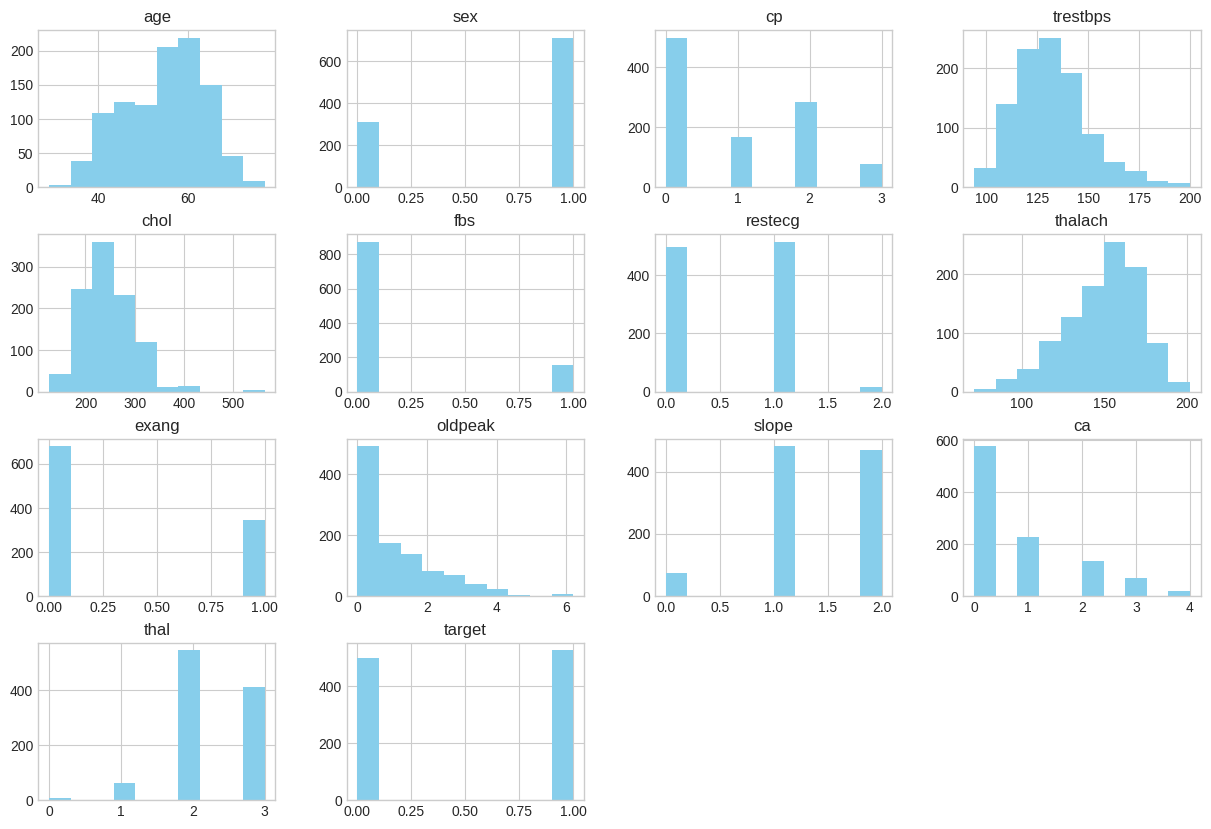

In [ ]:
df.hist(figsize=(15,10), color='skyblue')

<Figure size 1500x1000 with 0 Axes>

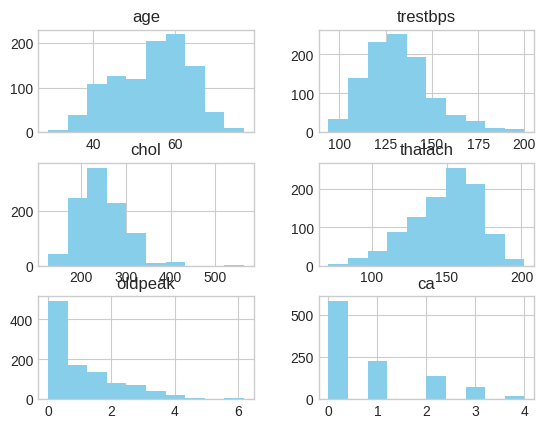

In [ ]:
# Membuat Histogram untuk data Kolom Numerik
plt.figure(figsize=(15,10))
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']].hist(color='skyblue')
plt.show()

In [ ]:
# melihat distribusi data Numerik
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']].skew()

age        -0.248866
trestbps    0.739768
chol        1.074073
thalach    -0.513777
oldpeak     1.210899
ca          1.261189
dtype: float64

Insight : Pada histrogram di atas dapat dikategorikan menjadi right skewed dan left skewed pada kolom numerik berikut penjelasannya.

 Distribusi Miring Kanan(Right Skewed): Modus < Median <Rata-rata. Pada Histogram  Data trestbps, oldpeak, chol

Distribusi Miring kiri(Left Skewed) : Rata-rata < Median pada histogram terdapat pada data age dan thalach

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

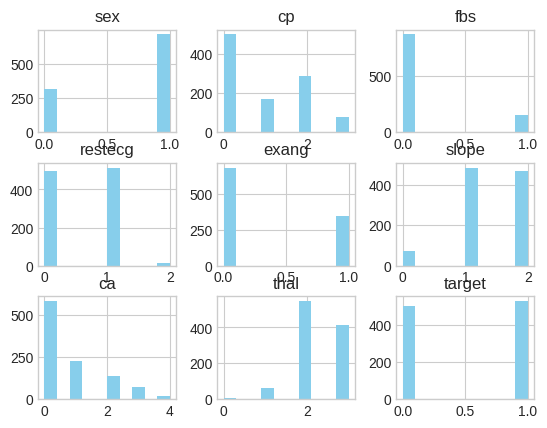

In [ ]:
# Histogram untuk kolom Categorical
df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']].hist(color='skyblue')

Pada Histogram di atas kolom kategori dapat ditentukan modus(nilai yang sering muncul) diantaranya:
- Data sex nilai modus 1 (laki-laki) yang lebih banyak mengalami sakit jantung
- cp dengan nilai modus 0 yaitu jenis nyeri dada yang dialami pasien adalah nyeri dada tipikal angina
- fbs dengan nilai modus 0 yang berarti pasien paling banyak memiliki fasting blood sugar yang tidak melebihi 120 mg/dL.
- restecg memiliki nilai modus 1 yaitu resting electrocardiographic result paling banyak terdapat kelainan gelombang S-T yang tidak normal.
- exang dengan nilai modus 0 yaitu pasien paling banyak tidak mengalami angina yang diinduksi oleh latih.
- slope dengan nilai modus 1 yaitu pasien paling banyak memiliki kemiringan segmen ST naik secara perlahan pada saat latihan puncak.
- ca dengan nilai modus 0 yaitu pasien memiliki kemungkinan yang kecil untuk terjadi penyempitan atau kerusakan pada pembuluh darah.
- thal dengan nilai modus 2 yaitu pasien paling banyak memiliki hasil tes thallium scan fixed defect
-target dengan nilai modus 1 yaitu pasien paling banyak memiliki riwayat risiko terkena penyakit jantung berdasarkan pertimbangan-pertimbangan di atas.

# Feature Enginee

In [ ]:

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menyiapkan DataFrame yang berisi fitur skala
data_to_scale = df[['chol']]  # fitur (chol->serum cholestoral dalam satuan mg/dl) yang ingin  diskala

# Melakukan min-max scaling
data_minmax = scaler.fit_transform(data_to_scale)

# Mengubah hasil menjadi DataFrame
data_minmax = pd.DataFrame(data_minmax, columns=['chol'])

data_minmax

,chol
0,0.196347
1,0.175799
2,0.109589
3,0.175799
4,0.383562
...,...
1020,0.216895
1021,0.301370
1022,0.340183
1023,0.292237


Chol (Serum Cholestoral): Mirip dengan tekanan darah, min-max scaling dapat membantu menormalkan rentang nilai serum cholestoral dalam data untuk memastikan bahwa dampaknya dalam analisis menjadi seimbang.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Features = df[['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',]]

Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

desc_norm_df = Norm_df.describe()

print(desc_norm_df)

               age          sex           cp     trestbps          fbs  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529878     0.695610     0.314146     0.354827     0.149268   
std       0.189006     0.460373     0.343214     0.165252     0.356527   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.395833     0.000000     0.000000     0.245283     0.000000   
50%       0.562500     1.000000     0.333333     0.339623     0.000000   
75%       0.666667     1.000000     0.666667     0.433962     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           restecg      thalach        exang      oldpeak        slope  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.264878     0.596291     0.336585     0.172825     0.692683   
std       0.263939     0.175616     0.472772     0.189525     0.308878   
min       0.000000     0.000000     0

1. Age(Usia), kebanyakan pasien dari usia 40-70 tahun dengan 25% dari usia pasien dibawah 40 tahun dan 25% lainnya berusia diatas 67 tahun. Hal ini bisa memudahkan tim kesehatan medis untuk melakukan analisis dan pemeriksaan pada rentang usia tertentu yg kebanyakan mengalami penyakit jantung
2. sex(jenis kelamin), kebanyakan pasien yang menderita adalah kaum pria
3. Chest pain Type -CP, jenis nyeri dada bervariasi dengan rata-rata sekitar 0.31
4. Tekanan Darah(Trestbps), sekitar 35% dari retang normal dgn standar deviasi sekitar 17%.
5. kolestrol, distribusi kolestrol berkisar dari 0 hingga 100% dan kebanyakan pasien memiliki kolestrol dari 19% - 34% dari nilai maksimal
6. Detak Jantung Maksimum (Max Heart Rate - Thalach), Detak jantung maksimum berkisar dari 0 hingga 100%, dengan sebagian besar pasien memiliki detak jantung maksimum di antara 47% hingga 73% dari nilai maksimal.
7. Angina yang Diinduksi Olahraga (Exercise Induced Angina - Exang), Sekitar 34% dari pasien mengalami angina yang diinduksi oleh latihan.
8. Tingkat Depresi ST (ST Depression - Oldpeak), Tingkat depresi ST rata-rata pasien adalah sekitar 17% dari rentang maksimal yang mungkin
9. Slope (Slope of the Peak Exercise ST Segment), Mayoritas pasien (sekitar 69%) memiliki kemiringan yang lebih curam dari segmen ST latihan puncak.
10. Jumlah Pembuluh Darah Utama Berwarna dengan Pewarnaan (Number of Major Vessels Colored by Flourosopy - Ca), Rata-rata pasien memiliki sekitar 19% dari jumlah pembuluh darah utama yang berwarna saat dilakukan pewarnaan


Melalui pemahaman dan karakteristik diatas Ahli kesehatan dapat melakukan perencanaan bagaimana untuk pencegahan awal, diagnosa, dan pengobatan yang harus ditingkakanlagi untuk menghadapi masalah sakit jantung.


In [ ]:
df = pd.DataFrame({
    'thal': ['normal', 'fixed', 'reversible'],
    'hasil_uji': ['normal', 'positive', 'negative']
})
df['thal_category'] = df['thal'].map({'normal': 1, 'fixed': 2, 'reversible': 3})

print(df)


         thal hasil_uji  thal_category
0      normal    normal              1
1       fixed  positive              2
2  reversible  negative              3


Distribusi frekuensi dari masing-masing jenis thalassemia yaitu Normal, fixed dan reversible. Dalam sampel data ini membantu tim medis memahami apakah jenis thalassemia tertentu lebih cenderung menghasilkan hasil uji positif atau negatif

In [ ]:
from sklearn.model_selection import train_test_split

# cross check-- the mean of target group by Sex
df['thalach'].groupby(df['sex']).mean()

sex
0    150.830128
1    148.363254
Name: thalach, dtype: float64

sex: jenis kelamin pasien (1 jika pria, 0 jika wanita) Rata-rata 'thalach' untuk nilai 'sex' yang tercatat sebagai 0 (wanita) adalah sekitar 150.83.

Rata-rata 'thalach' untuk nilai 'sex' yang tercatat sebagai 1 (pria) adalah sekitar 148.36.

Hasil ini menunjukkan perbedaan rata-rata detak jantung maksimum ('thalach') antara wanita dan pria. Dalam konteks medis, detak jantung maksimum dapat berbeda antara pria dan wanita, dan hasil ini memberikan gambaran tentang perbedaan ini dalam sampel data yang digunakan. Perbedaan ini bisa menjadi informasi penting dalam menganalisis data kesehatan atau data e-commerce yang berkaitan dengan kesehatan, seperti produk-produk kebugaran atau peralatan medis.

In [ ]:
scaler = StandardScaler()
df['standardized_resting_bp'] = scaler.fit_transform(df[['trestbps']])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,standardized_resting_bp
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,-0.377636
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.479107
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.764688
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.936037
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.364875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0.479107
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,-0.377636
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,-1.234378
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,-1.234378


Dengan penambahan Kolom baru yang berisi nilai tekanan darah saat istirahat telah dinormalisasi untuk menyamakan skala data sehingga rentang nilai menjadi lebih baik dalam analisis statistik

In [ ]:
df['avg_blood_pressure'] = (df['trestbps'] + df['trestbps']) / 2
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,standardized_resting_bp,avg_blood_pressure
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,-0.377636,125.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.479107,140.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.764688,145.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.936037,148.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.364875,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0.479107,140.0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,-0.377636,125.0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,-1.234378,110.0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,-1.234378,110.0


Fitur avg_blood_pressure yang merupakan rata-rata dari tekanan darah sistolik dan diastolik tim medis dapat dengan mudah melihat gambaran umum tentang tekanan darah pasien. hal ini memudahkan proses dan pemantauan kesehatan pasien

In [ ]:
# Definisi data baru
df = pd.DataFrame({
    'weight': [70, 65, 80, 90, 75],
    'height': [170, 165, 175, 180, 172]
})

# Mendefinisikan fungsi untuk mengkodekan kategori risiko berdasarkan BMI
def encode_bmi_risk(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Menambahkan kolom 'bmi' ke DataFrame
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Menambahkan kolom 'bmi_risk' berdasarkan risiko penyakit jantung
df['bmi_risk'] = df['bmi'].apply(encode_bmi_risk)

# Menampilkan DataFrame
print(df)


   weight  height        bmi    bmi_risk
0      70     170  24.221453      Normal
1      65     165  23.875115      Normal
2      80     175  26.122449  Overweight
3      90     180  27.777778  Overweight
4      75     172  25.351541  Overweight


Indeks Massa Tubuh (Body Mass Index): Perhitungan BMI dari berat dan tinggi badan pasien. BMI tinggi bisa menjadi faktor risiko untuk penyakit jantung. Ini memungkinkan timmedis untuk lebih fokus pada pasien yang mungkin memerlukan perawatan lebih intensif atau pencegahan lebih lanjut terhadap penyakut jantung

In [ ]:
df['kolestrol_ratio'] = df['chol'] / df['trestbps']
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  kolestrol_ratio  
0         2   2     3     

Fitur 'kolesterol_ratio' dapat memberikan gambaran tentang risiko kardiovaskular pasien. Rasio yang tinggi mungkin menandakan risiko penyakit jantung yang lebih tinggi, sementara rasio yang rendah mungkin menunjukkan risiko yang lebih rendah.

In [ ]:
# Menambahkan kolom 'thalach_age_percentage' ke DataFrame
df['thalach_age_percentage'] = (df['thalach'] / (220 - df['age'])) * 100

# Menentukan rentang normal detak jantung berdasarkan usia
def normal_range(age):
    if age >= 18 and age <= 30:
        return (60, 100)  # Rentang normal untuk usia 18-30 tahun
    elif age > 30 and age <= 40:
        return (58, 98)   # Rentang normal untuk usia 31-40 tahun
    elif age > 40 and age <= 50:
        return (56, 96)   # Rentang normal untuk usia 41-50 tahun
    else:
        return (0, 0)      # Nilai default jika usia tidak tercakup dalam rentang yang didefinisikan

# Mengkategorikan 'thalach_age_percentage' berdasarkan rentang normal
def categorize_thalach_age(thalach_age_percentage, age):
    normal_min, normal_max = normal_range(age)
    if normal_min == 0 and normal_max == 0:
        return 'Age Out of Range'  # Kategori untuk usia yang tidak tercakup dalam rentang yang didefinisikan
    elif thalach_age_percentage < normal_min:
        return 'Below Normal'
    elif thalach_age_percentage >= normal_min and thalach_age_percentage <= normal_max:
        return 'Normal'
    else:
        return 'Above Normal'

# Menambahkan kolom 'thalach_age_category' ke DataFrame berdasarkan rentang normal
df['thalach_age_category'] = df.apply(lambda row: categorize_thalach_age(row['thalach_age_percentage'], row['age']), axis=1)

# Menampilkan DataFrame
print(df)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  kolestrol_ratio  thalach_age_percentage  \
0

Fitur thalach_age_percentage dapat memudahkan mengevaluasi efisiensi detak jantung pasien dibandingkan dengan detak jantung maksimum yang diharapkan berdasarkan usia pasien. Melalui pemahaman ini memberikan wawasan yang penting dalam penilaian kesehatan jantung

In [ ]:
# Memsihkan fitur dan label
X = df.drop('target', axis=1)
y = df['target']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier()

#  model
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

# Cara menghitung akurasinya
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)


Akurasi model: 0.9853658536585366


Dengan Menggunakan Random Forest Classifier untuk memprediksi resiko penyakit jantung berdasarkan fitur yang sudah ada. Dengan membuat Data latih dan data uji hal ini membuat evaluasi akurasi model menggunakan data uji sehingga membantu dokter dan tim medis dalam diagnosa awal

#**QUESTIONS**

## 1,2

Peserta harus membagi dataset menjadi dua bagian utama: data pelatihan (training data) dan data pengujian (testing data). Data pelatihan digunakan untuk melatih model, sedangkan data pengujian digunakan untuk menguji kinerja model yang sudah dilatih.

Berdasarkan pemahaman tersebut, peserta akan menentukan model machine learning yang paling sesuai dengan karakteristik dataset dan tujuan yang ingin dicapai. Ini bisa menjadi model regresi, klasifikasi, pengelompokan, atau model lainnya.

### Korelasi antar variabel

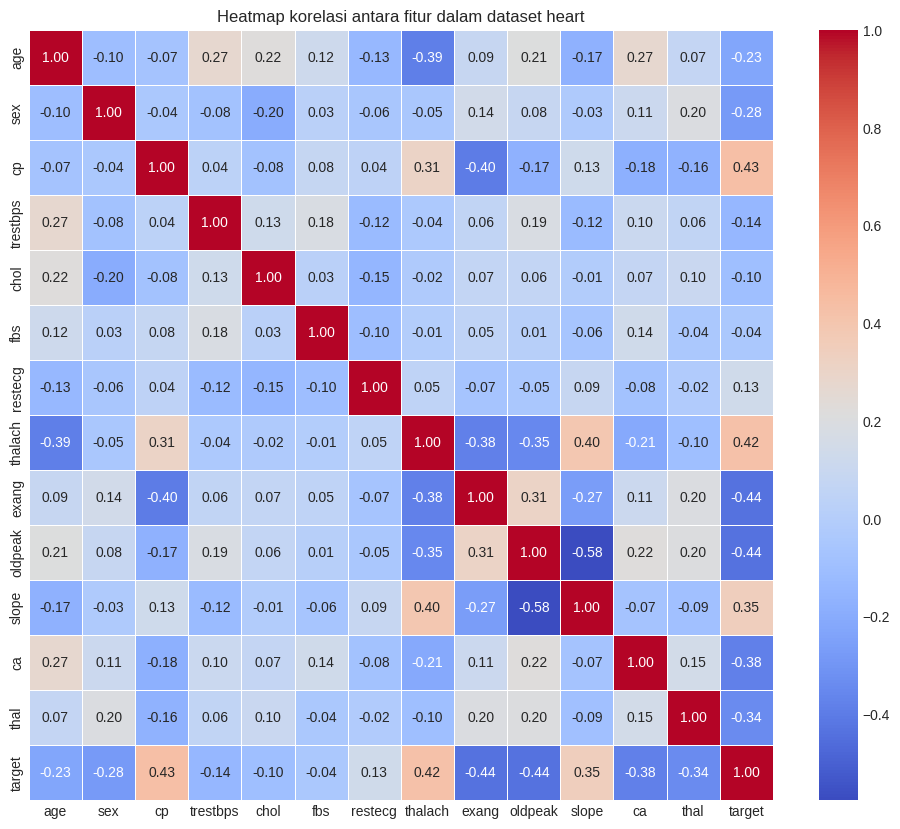

In [ ]:
correlation_matrix = df.corr()
# Menampilkan matriks korelasi sebagai heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
#sns.heatmap(df.corr(), annot=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=.5)
plt.title('Heatmap korelasi antara fitur dalam dataset heart')
plt.show()

In [ ]:
print(df['target'].describe())


count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64


In [ ]:
print(df.shape)
df.info()

(1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
X = df.drop(columns=['target'])
y = df['target']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(len(y_test))

205


In [ ]:
print(len(X_test))

205


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_predict.flatten()

In [ ]:
x_train-np.arange(0, len(x_train),1)

163      1
291      0
280     -2
85      -2
239     -4
      ... 
267   -235
77    -236
125   -238
522   -239
119   -239
Name: sex, Length: 241, dtype: int64

In [ ]:
# uji coba 4
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Bagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Linear Regression
model = LinearRegression()

# Latih model pada data pelatihan
model.fit(X_train, y_train)

# Prediksi pada data uji
y_predict = model.predict(X_test)

# Evaluasi prediksi
print('r2:', r2_score(y_test, y_predict))
print('MAE:', mean_absolute_error(y_test, y_predict))
print('RMSE:', (mean_squared_error(y_test, y_predict) ** 0.5))


r2: 0.40960801060785557
MAE: 0.3096660894747363
RMSE: 0.3841802769541507


Mean Squared Error: 0.14759448520056795
R-squared: 0.40960801060785557
Mean Absolute Error: 0.3096660894747363


ValueError: x and y must be the same size

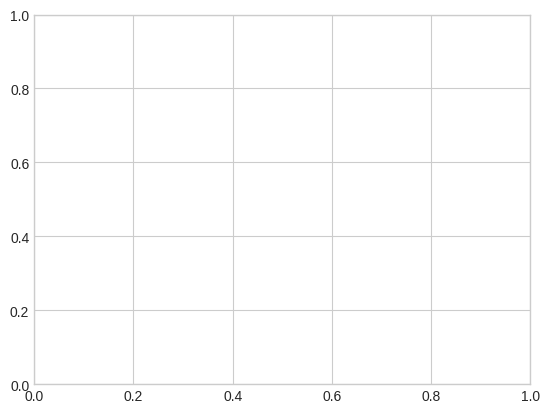

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_predict, color='green', label='Predicted')
plt.plot(X_test, X_test * model.coef_ + model.intercept_, color='blue', linestyle='--', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn import linear_model

import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [ ]:
# Uji coba 1
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [ ]:
# uji coba 2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# uji coba 3
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred = y_predict.flatten()

print('r2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE:', (mean_squared_error(y_test, y_pred)**0.5))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0,50), color = 'green')
plt.grid(True)

In [ ]:
x = df.iloc[1, -1]#[:,1]
y = df.iloc[1, -1] #[:,-1]

In [ ]:
y

0

In [ ]:
# Memisahkan data train dan data test
jumlah_data_latih = int(0.8 * len(x))
jumlah_data_uji = len(x) - jumlah_data_latih  # sisa jumlah data latih

TypeError: object of type 'numpy.int64' has no len()

In [ ]:
jumlah_data_latih

241

In [ ]:
jumlah_data_uji

61

In [ ]:
# mengambil data x_train dan y_train sesuai dengan jumlah yang sudah didapat
x_train, y_train = x[:jumlah_data_latih], y[:jumlah_data_latih]
x_test, y_test = x[:jumlah_data_uji], y[:jumlah_data_uji]

In [ ]:
regressor = linear_model.LinearRegression()

In [ ]:
# Melakukan fiting
regressor.fit(x_train, y_train)

In [ ]:
# Melakukan Predict
y_pred = regressor.predict(x_test)
y_pred

array([ 0.2907465 ,  0.02562214, -0.06374822,  0.39085706,  0.13358668,
        0.61045421, -0.01648261,  0.06029218,  0.48001245, -0.08150543,
        0.54819428,  0.30312055,  1.07784228, -0.37436941,  0.71502689,
        0.7994951 , -0.04091166,  0.9450862 ,  0.93387423,  0.55829552,
        0.56786353,  0.30326816,  1.07450455,  1.08551928,  0.35138029,
        0.90457188,  0.70649579,  0.67748698,  0.25873001,  0.32838303,
        0.04075972,  0.10607502,  0.969658  ,  0.55125499,  0.66769338,
        0.68649928,  0.09353034,  0.51421122,  0.92424408,  0.65825112,
        0.83269868,  0.92507859,  0.74042712,  0.7908037 ,  0.13373459,
        0.77304   ,  0.19451691,  1.1330309 ,  0.39868975,  0.50506379,
        0.20325903, -0.25090185,  0.71100664,  0.73355502,  0.53170612,
        0.61251771,  0.93646101,  0.12065756,  0.82183265,  0.71169955,
        0.64728654])

In [ ]:
# Melakukan Ploting dari nilai dan garis membuat Linear
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='green', linewidth=2)
plt.show()

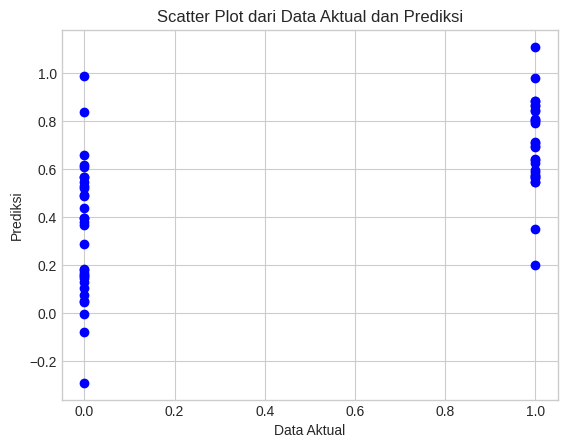

In [ ]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Mengambil data dari DataFrame atau file CSV
# Misalnya, Anda sudah memiliki DataFrame df yang berisi data

# Memisahkan fitur (x) dan target (y)
x = df.iloc[:, :-1]  # Mengambil semua fitur kecuali kolom terakhir
y = df.iloc[:, -1]   # Mengambil kolom terakhir sebagai target

# Memisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Melatih model regresi linear
model = LinearRegression()
model.fit(x_train, y_train)

# Membuat prediksi menggunakan data uji
y_pred = model.predict(x_test)

# Plot scatter plot dari data aktual dan prediksi
plt.scatter(y_test, y_pred, color='blue')
plt.title('Scatter Plot dari Data Aktual dan Prediksi')
plt.xlabel('Data Aktual')
plt.ylabel('Prediksi')
plt.show()
